In [ ]:
pip install pandas


In [ ]:
pip install pydotplus

In [ ]:
pip install matplotlib

In [ ]:
pip install numpy

In [ ]:
pip install graphviz

In [ ]:
pip install sklearn

In [ ]:
pip install xlrd

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
import sklearn
from IPython.display import Image  
import pydotplus
import matplotlib
pd.set_option('display.max_rows', 500)


Andiamo a importare i dati, utilizzando questo metodo per specificare il percorso. Nella funzione read_excel possiamo andare a specificare il missing value, che verrà tradotto con un NaN.

I dati devono quindi essere convertiti in un dataframe.

In [ ]:

data = pd.read_excel(r'C:\Users\giuli\Documents\GitHub\Business_Intelligence_ES4_DecisionTree\Users.xls', na_values='?')
df = pd.DataFrame(data)
df[df['Workclass'].isna()]

Andiamo a sostituire i dati mancanti con i dati della colonna più frequenti (ossia la moda). l'output di df.mode ha due righe perché nella colonna 'Age' sono presenti due mode. 

In [ ]:
df.mode()

andiamo a fillare tutti gli NaN con la moda della rispettiva colonna

In [ ]:
df = df.fillna(df.mode().iloc[0])
df[df['Workclass'].isna()]
df.dtypes
df_enc = df

for col in df_enc.columns:
    df_enc[col]=df_enc[col].astype('category')
    df_enc[col]=df_enc[col].cat.codes

df_enc['Age']=df_enc['Age'].astype('int64')

df_enc

In [ ]:
dfX= df_enc.iloc[:, 0:9]
dfY = df_enc.iloc[:, 9]

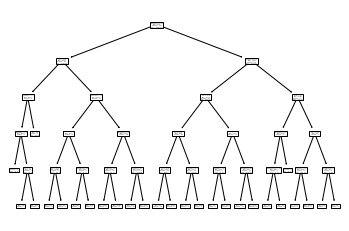

In [42]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(dfX, dfY)
tree.plot_tree(clf, feature_names=df_enc.columns)
matplotlib.pyplot.show()


In [19]:
data_topredict = pd.read_excel(r'C:\Users\giuli\Documents\GitHub\Business_Intelligence_ES4_DecisionTree\Prospects.xls', na_values='?')
df_toPredict= pd.DataFrame(data_topredict)

In [20]:
df_toPredict.head()

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,Native Country
0,25,Private,HS-grad,Never-married,Farming-fishing,Unmarried,White,Male,NaN
1,46,Private,9th,Married-civ-spouse,Other-service,Husband,White,Male,United-States
2,37,Private,1st-4th,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,Cambodia
3,41,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
4,44,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [24]:
for col in df_toPredict.columns:
    df_toPredict[col] = df_toPredict[col].astype('category')
    df_toPredict[col] = df_toPredict[col].cat.codes

df_toPredict['Age'] = df_toPredict['Age'].astype('int64')

In [43]:
predictions = clf.predict(df_toPredict)

In [44]:
predictions[33]

1

In [45]:
clf.score(dfX, dfY)

0.836